### Base de Dados - Olist Brazilian E-Commerce

Esta base de dados é proveniente do Brazilian E-Commerce Public Dataset by Olist, amplamente utilizado em estudos acadêmicos e projetos de ciência de dados. Ela contém informações reais de transações de comércio eletrônico realizadas entre 2016 e 2018 no Brasil, cobrindo o ciclo completo de vendas online:

Pedidos (Orders): detalhes de cada compra realizada na plataforma.
Itens do pedido (Order Items): produtos vendidos, preços e frete.
Clientes (Customers): informações geográficas e identificadores de clientes.
Sellers (Vendedores): localização e características dos lojistas que venderam na plataforma.
Produtos (Products): descrição e categoria dos itens ofertados.
Pagamentos (Payments): formas e valores de pagamento utilizados.
Avaliações (Reviews): notas e comentários dos clientes sobre os pedidos.
Geolocalização (Geolocation): dados de latitude/longitude para CEPs de clientes e sellers.
Após o processo de integração e tratamento, os dados foram organizados em uma tabela fato denormalizada (olist_order_lines_denorm.csv) e dimensões auxiliares (dim_customers.csv, dim_products.csv, dim_sellers.csv), facilitando análises descritivas e a construção de dashboards.

Link do colab: https://colab.research.google.com/drive/1UoICU2GxzpfjkP2i7M1pIJFvroeRQXCs?usp=sharing

In [1]:
import pandas as pd

customers = "/Users/leonardo/Documents/PyCharm/Github/IBMEC_2025_DataScience/extracao/base_de_dados/outputs/dim_customers.csv"
products = "/Users/leonardo/Documents/PyCharm/Github/IBMEC_2025_DataScience/extracao/base_de_dados/outputs/dim_products.csv"
sellers = "/Users/leonardo/Documents/PyCharm/Github/IBMEC_2025_DataScience/extracao/base_de_dados/outputs/dim_sellers.csv"
olist = "/Users/leonardo/Documents/PyCharm/Github/IBMEC_2025_DataScience/extracao/base_de_dados/outputs/olist_order_lines_denorm.csv"

In [2]:

# Carregar os arquivos enviados pelo usuário
dim_customers = pd.read_csv(customers)
dim_products = pd.read_csv(products)
dim_sellers = pd.read_csv(sellers)
order_lines = pd.read_csv(olist)

# --------------------
# Análises descritivas
# --------------------

# Dimensão clientes
customers_overview = {
    "total_customers": dim_customers["customer_id"].nunique(),
    "unique_cities": dim_customers["customer_city"].nunique(),
    "unique_states": dim_customers["customer_state"].nunique(),
    "top_states": dim_customers["customer_state"].value_counts().head(5).to_dict()
}

# Dimensão produtos
products_overview = {
    "total_products": dim_products["product_id"].nunique(),
    "unique_categories": dim_products["product_category_name"].nunique(),
    "top_categories": dim_products["product_category_name"].value_counts().head(5).to_dict()
}

# Dimensão vendedores
sellers_overview = {
    "total_sellers": dim_sellers["seller_id"].nunique(),
    "unique_cities": dim_sellers["seller_city"].nunique(),
    "unique_states": dim_sellers["seller_state"].nunique(),
    "top_states": dim_sellers["seller_state"].value_counts().head(5).to_dict()
}

# Tabela fato - pedidos
order_lines_overview = {
    "total_orders": order_lines["order_id"].nunique(),
    "total_items": order_lines.shape[0],
    "period_min": pd.to_datetime(order_lines["order_purchase_timestamp"]).min(),
    "period_max": pd.to_datetime(order_lines["order_purchase_timestamp"]).max(),
    "total_gmv": order_lines["item_gmv"].sum(),
    "avg_ticket": order_lines.groupby("order_id")["item_gmv"].sum().mean(),
    "review_score_mean": order_lines["review_score_mean"].mean()
}

# Exibir resumo consolidado
analysis_summary = {
    "customers": customers_overview,
    "products": products_overview,
    "sellers": sellers_overview,
    "orders": order_lines_overview
}

analysis_summary


{'customers': {'total_customers': 98666,
  'unique_cities': 4110,
  'unique_states': 27,
  'top_states': {'SP': 41375,
   'RJ': 12762,
   'MG': 11544,
   'RS': 5432,
   'PR': 4998}},
 'products': {'total_products': 32951,
  'unique_categories': 73,
  'top_categories': {'cama_mesa_banho': 3029,
   'esporte_lazer': 2867,
   'moveis_decoracao': 2657,
   'beleza_saude': 2444,
   'utilidades_domesticas': 2335}},
 'sellers': {'total_sellers': 3095,
  'unique_cities': 611,
  'unique_states': 23,
  'top_states': {'SP': 1849, 'PR': 349, 'MG': 244, 'SC': 190, 'RJ': 171}},
 'orders': {'total_orders': 98666,
  'total_items': 112650,
  'period_min': Timestamp('2016-09-04 21:15:19'),
  'period_max': Timestamp('2018-09-03 09:06:57'),
  'total_gmv': np.float64(15843553.24),
  'avg_ticket': np.float64(160.57763809214924),
  'review_score_mean': np.float64(4.03312803618959)}}

In [3]:
order_lines_overview

{'total_orders': 98666,
 'total_items': 112650,
 'period_min': Timestamp('2016-09-04 21:15:19'),
 'period_max': Timestamp('2018-09-03 09:06:57'),
 'total_gmv': np.float64(15843553.24),
 'avg_ticket': np.float64(160.57763809214924),
 'review_score_mean': np.float64(4.03312803618959)}

In [4]:
dim_sellers

,seller_id,seller_city,seller_state
0,48436dade18ac8b2bce089ec2a041202,volta redonda,SP
1,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,SP
2,5b51032eddd242adc84c38acab88f23d,borda da mata,MG
3,9d7a1d34a5052409006425275ba1c2b4,franca,SP
4,df560393f3a51e74553ab94004ba5c87,loanda,PR
...,...,...,...
3090,d1aa1ec0839dcab73a6161130eb1f94a,curitiba,PR
3091,dbc51f5e45d654ecc16cb68e6817ecea,franca,SP
3092,3fefda3299e6dfaea3466ef346a3571a,curitiba,PR
3093,80ceebb4ee9b31afb6c6a916a574a1e2,londrina,PR


In [5]:
dim_customers

,customer_id,customer_city,customer_state
0,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ
1,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP
2,6489ae5e4333f3693df5ad4372dab6d3,para de minas,MG
3,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP
4,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,SP
...,...,...,...
98661,b51593916b4b8e0d6f66f2ae24f2673d,sao luis,MA
98662,84c5d4fbaf120aae381fad077416eaa0,curitiba,PR
98663,29309aa813182aaddc9b259e31b870e6,sao paulo,SP
98664,b5e6afd5a41800fdf401e0272ca74655,vinhedo,SP


In [6]:
dim_products

,product_id,product_category_name,product_category_name_english
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop
2,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor
3,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery
4,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools
...,...,...,...
32946,4cc4d02efc8f249c13355147fb44e34d,ferramentas_jardim,garden_tools
32947,b10ecf8e33aaaea419a9fa860ea80fb5,moveis_decoracao,furniture_decor
32948,dd469c03ad67e201bc2179ef077dcd48,relogios_presentes,watches_gifts
32949,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,sports_leisure


In [7]:
order_lines

,order_id,order_item_id,product_id,seller_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,n_payments,review_score_mean,n_reviews,product_name_lenght,product_description_lenght,product_photos_qty,customer_unique_id,review_score_median,customer_zip_points,seller_zip_points
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,...,1.0,5.0,1.0,58.0,598.0,4.0,871766c5855e863f6eccc05f988b23cb,5.0,149.0,59.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,...,1.0,4.0,1.0,56.0,239.0,2.0,eb28e67c4c0b83846050ddfb8a35d051,4.0,367.0,39.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,...,1.0,5.0,1.0,59.0,695.0,2.0,3818d81c6709e39d06b2738a8d3a2474,5.0,224.0,71.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,...,1.0,4.0,1.0,42.0,480.0,1.0,af861d436cfc08b2c2ddefd0ba074622,4.0,27.0,438.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,...,1.0,5.0,1.0,59.0,409.0,1.0,64b576fb70d441e8f1b2d7d446e483c5,5.0,4.0,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,...,1.0,5.0,1.0,43.0,1002.0,3.0,0c9aeda10a71f369396d0c04dce13a64,5.0,89.0,171.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,...,1.0,5.0,1.0,31.0,232.0,1.0,0da9fe112eae0c74d3ba1fe16de0988b,5.0,46.0,30.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,...,1.0,5.0,1.0,43.0,869.0,1.0,cd79b407828f02fdbba457111c38e4c4,5.0,57.0,290.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,...,1.0,5.0,1.0,56.0,1306.0,1.0,eb803377c9315b564bdedad672039306,5.0,61.0,19.0


In [8]:
order_lines.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'price', 'freight_value', 'item_gmv',
       'shipping_limit_date', 'customer_city', 'customer_state',
       'customer_zip_code_prefix', 'customer_lat', 'customer_lng',
       'seller_city', 'seller_state', 'seller_zip_code_prefix', 'seller_lat',
       'seller_lng', 'product_category_name', 'product_category_name_english',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'total_payment_value', 'n_payments',
       'review_score_mean', 'n_reviews', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty',
       'customer_unique_id', 'review_score_median', 'customer_zip_points',
       'seller_zip_points'],
      dtype='object')

## 📊 Análise Quantitativa de Vendas e Receitas

# Este notebook apresenta uma análise detalhada das vendas e receitas
# com métricas-chave, análises temporais e insights estratégicos.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Converter coluna de data para datetime
order_lines['order_purchase_timestamp'] = pd.to_datetime(order_lines['order_purchase_timestamp'])


### 1. Métricas Gerais de Receita


In [10]:
# ============================================
# MÉTRICAS PRINCIPAIS DE RECEITA
# ============================================

print("=" * 80)
print(" RESUMO EXECUTIVO - VENDAS E RECEITAS")
print("=" * 80)

# Receitas
receita_total = order_lines['item_gmv'].sum()
receita_produtos = order_lines['price'].sum()
receita_frete = order_lines['freight_value'].sum()

# Pedidos
total_pedidos = order_lines['order_id'].nunique()
total_itens = len(order_lines)
itens_por_pedido = total_itens / total_pedidos

# Ticket Médio
ticket_medio = order_lines.groupby('order_id')['item_gmv'].sum().mean()
ticket_mediano = order_lines.groupby('order_id')['item_gmv'].sum().median()

# Valores médios
preco_medio_produto = order_lines['price'].mean()
frete_medio = order_lines['freight_value'].mean()

print(f"\n RECEITA TOTAL (GMV)............: R$ {receita_total:,.2f}")
print(f"   ├─ Receita de Produtos.........: R$ {receita_produtos:,.2f} ({receita_produtos/receita_total*100:.1f}%)")
print(f"   └─ Receita de Frete............: R$ {receita_frete:,.2f} ({receita_frete/receita_total*100:.1f}%)")

print(f"\n VOLUME DE VENDAS")
print(f"   ├─ Total de Pedidos............: {total_pedidos:,}")
print(f"   ├─ Total de Itens..............: {total_itens:,}")
print(f"   └─ Itens por Pedido (média)....: {itens_por_pedido:.2f}")

print(f"\n TICKET MÉDIO")
print(f"   ├─ Ticket Médio por Pedido.....: R$ {ticket_medio:,.2f}")
print(f"   ├─ Ticket Mediano..............: R$ {ticket_mediano:,.2f}")
print(f"   ├─ Preço Médio por Produto.....: R$ {preco_medio_produto:,.2f}")
print(f"   └─ Frete Médio.................: R$ {frete_medio:,.2f}")

print("\n" + "=" * 80)


 RESUMO EXECUTIVO - VENDAS E RECEITAS

 RECEITA TOTAL (GMV)............: R$ 15,843,553.24
   ├─ Receita de Produtos.........: R$ 13,591,643.70 (85.8%)
   └─ Receita de Frete............: R$ 2,251,909.54 (14.2%)

 VOLUME DE VENDAS
   ├─ Total de Pedidos............: 98,666
   ├─ Total de Itens..............: 112,650
   └─ Itens por Pedido (média)....: 1.14

 TICKET MÉDIO
   ├─ Ticket Médio por Pedido.....: R$ 160.58
   ├─ Ticket Mediano..............: R$ 105.29
   ├─ Preço Médio por Produto.....: R$ 120.65
   └─ Frete Médio.................: R$ 19.99



### 2. Análise Temporal de Vendas


In [11]:
# ============================================
# EVOLUÇÃO TEMPORAL DAS VENDAS
# ============================================

# Criar colunas temporais
order_lines['ano'] = order_lines['order_purchase_timestamp'].dt.year
order_lines['mes'] = order_lines['order_purchase_timestamp'].dt.month
order_lines['ano_mes'] = order_lines['order_purchase_timestamp'].dt.to_period('M')
order_lines['trimestre'] = order_lines['order_purchase_timestamp'].dt.to_period('Q')
order_lines['dia_semana'] = order_lines['order_purchase_timestamp'].dt.day_name()
order_lines['dia_mes'] = order_lines['order_purchase_timestamp'].dt.day

# Vendas mensais
vendas_mensais = order_lines.groupby('ano_mes').agg({
    'item_gmv': 'sum',
    'order_id': 'nunique',
    'order_item_id': 'count'
}).reset_index()

vendas_mensais.columns = ['periodo', 'receita', 'pedidos', 'itens']
vendas_mensais['ticket_medio'] = vendas_mensais['receita'] / vendas_mensais['pedidos']
vendas_mensais['periodo_str'] = vendas_mensais['periodo'].astype(str)

print("\n EVOLUÇÃO MENSAL DE VENDAS")
print("=" * 100)
print(f"{'Período':<12} {'Receita (R$)':>15} {'Pedidos':>10} {'Itens':>10} {'Ticket Médio':>15}")
print("=" * 100)
for _, row in vendas_mensais.tail(12).iterrows():
    print(f"{row['periodo_str']:<12} {row['receita']:>15,.2f} {row['pedidos']:>10,} {row['itens']:>10,} {row['ticket_medio']:>15,.2f}")
print("=" * 100)



 EVOLUÇÃO MENSAL DE VENDAS
Período         Receita (R$)    Pedidos      Itens    Ticket Médio
2017-10           769,312.37      4,568      5,322          168.41
2017-11         1,179,143.77      7,451      8,665          158.25
2017-12           863,547.23      5,624      6,308          153.55
2018-01         1,107,301.89      7,220      8,208          153.37
2018-02           986,908.96      6,694      7,672          147.43
2018-03         1,155,126.82      7,188      8,217          160.70
2018-04         1,159,698.04      6,934      7,975          167.25
2018-05         1,149,781.82      6,853      7,925          167.78
2018-06         1,022,677.11      6,160      7,078          166.02
2018-07         1,058,728.03      6,273      7,092          168.78
2018-08         1,003,308.47      6,452      7,248          155.50
2018-09               166.46          1          1          166.46


/var/folders/4x/hfgjb39s7kl7rrm2hp1c6bq40000gn/T/ipykernel_2460/819076711.py:49: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/leonardo/Documents/PyCharm/Github/ProjetoExtracaoEco/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


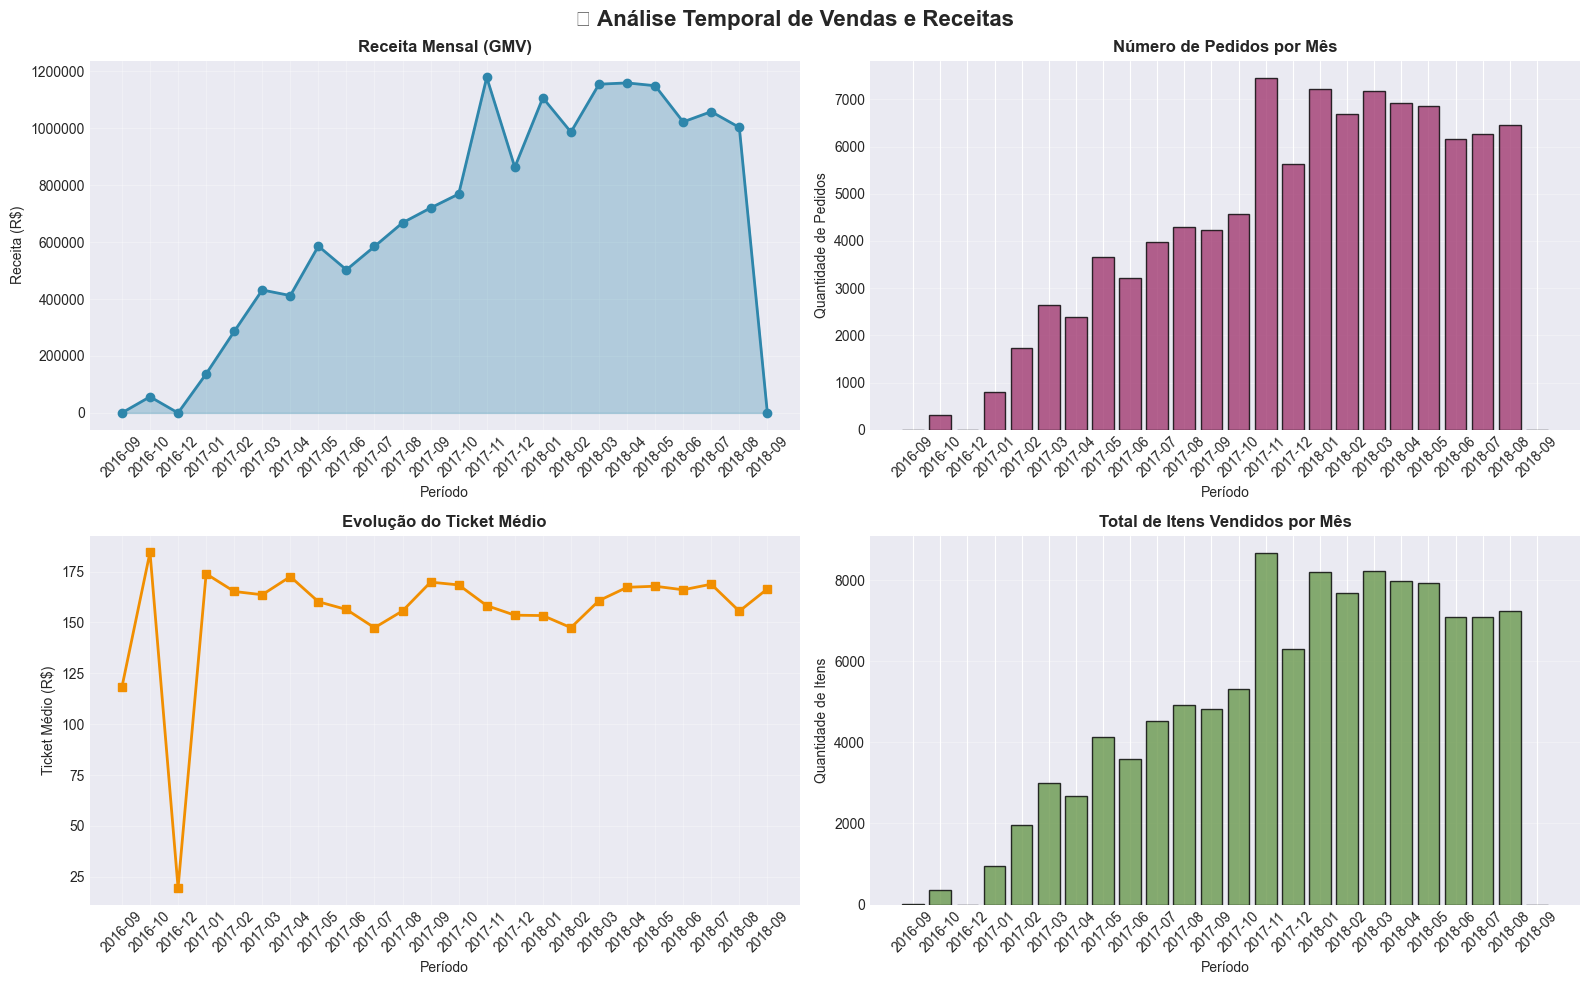

In [12]:
# ============================================
# GRÁFICO: EVOLUÇÃO DA RECEITA MENSAL

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('📊 Análise Temporal de Vendas e Receitas', fontsize=16, fontweight='bold')

# Gráfico 1: Receita Mensal
ax1 = axes[0, 0]
ax1.plot(vendas_mensais['periodo_str'], vendas_mensais['receita'], 
         marker='o', linewidth=2, markersize=6, color='#2E86AB')
ax1.fill_between(range(len(vendas_mensais)), vendas_mensais['receita'], alpha=0.3, color='#2E86AB')
ax1.set_title('Receita Mensal (GMV)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Período')
ax1.set_ylabel('Receita (R$)')
ax1.ticklabel_format(style='plain', axis='y')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Gráfico 2: Número de Pedidos
ax2 = axes[0, 1]
ax2.bar(vendas_mensais['periodo_str'], vendas_mensais['pedidos'], 
        color='#A23B72', alpha=0.8, edgecolor='black')
ax2.set_title('Número de Pedidos por Mês', fontsize=12, fontweight='bold')
ax2.set_xlabel('Período')
ax2.set_ylabel('Quantidade de Pedidos')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Gráfico 3: Ticket Médio
ax3 = axes[1, 0]
ax3.plot(vendas_mensais['periodo_str'], vendas_mensais['ticket_medio'], 
         marker='s', linewidth=2, markersize=6, color='#F18F01')
ax3.set_title('Evolução do Ticket Médio', fontsize=12, fontweight='bold')
ax3.set_xlabel('Período')
ax3.set_ylabel('Ticket Médio (R$)')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# Gráfico 4: Itens Vendidos
ax4 = axes[1, 1]
ax4.bar(vendas_mensais['periodo_str'], vendas_mensais['itens'], 
        color='#6A994E', alpha=0.8, edgecolor='black')
ax4.set_title('Total de Itens Vendidos por Mês', fontsize=12, fontweight='bold')
ax4.set_xlabel('Período')
ax4.set_ylabel('Quantidade de Itens')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 3. Análise de Crescimento


In [13]:
# ============================================
# TAXAS DE CRESCIMENTO
# ============================================

# Crescimento mês a mês
vendas_mensais['receita_anterior'] = vendas_mensais['receita'].shift(1)
vendas_mensais['crescimento_receita'] = ((vendas_mensais['receita'] - vendas_mensais['receita_anterior']) 
                                          / vendas_mensais['receita_anterior'] * 100)

vendas_mensais['pedidos_anterior'] = vendas_mensais['pedidos'].shift(1)
vendas_mensais['crescimento_pedidos'] = ((vendas_mensais['pedidos'] - vendas_mensais['pedidos_anterior']) 
                                          / vendas_mensais['pedidos_anterior'] * 100)

print("\n ANÁLISE DE CRESCIMENTO (MÊS A MÊS)")
print("=" * 90)
print(f"{'Período':<12} {'Receita (R$)':>15} {'Cresc. Receita':>15} {'Pedidos':>10} {'Cresc. Pedidos':>15}")
print("=" * 90)

for _, row in vendas_mensais.tail(12).iterrows():
    cresc_rec = f"{row['crescimento_receita']:+.1f}%" if not pd.isna(row['crescimento_receita']) else "N/A"
    cresc_ped = f"{row['crescimento_pedidos']:+.1f}%" if not pd.isna(row['crescimento_pedidos']) else "N/A"
    print(f"{row['periodo_str']:<12} {row['receita']:>15,.2f} {cresc_rec:>15} {row['pedidos']:>10,} {cresc_ped:>15}")

print("=" * 90)

# Crescimento acumulado
primeiro_periodo = vendas_mensais.iloc[0]
ultimo_periodo = vendas_mensais.iloc[-1]

crescimento_total_receita = ((ultimo_periodo['receita'] - primeiro_periodo['receita']) 
                              / primeiro_periodo['receita'] * 100)
crescimento_total_pedidos = ((ultimo_periodo['pedidos'] - primeiro_periodo['pedidos']) 
                              / primeiro_periodo['pedidos'] * 100)

print(f"\n🎯 CRESCIMENTO TOTAL ({primeiro_periodo['periodo_str']} → {ultimo_periodo['periodo_str']})")
print(f"   ├─ Crescimento de Receita......: {crescimento_total_receita:+.1f}%")
print(f"   └─ Crescimento de Pedidos......: {crescimento_total_pedidos:+.1f}%")



 ANÁLISE DE CRESCIMENTO (MÊS A MÊS)
Período         Receita (R$)  Cresc. Receita    Pedidos  Cresc. Pedidos
2017-10           769,312.37           +6.8%      4,568           +7.7%
2017-11         1,179,143.77          +53.3%      7,451          +63.1%
2017-12           863,547.23          -26.8%      5,624          -24.5%
2018-01         1,107,301.89          +28.2%      7,220          +28.4%
2018-02           986,908.96          -10.9%      6,694           -7.3%
2018-03         1,155,126.82          +17.0%      7,188           +7.4%
2018-04         1,159,698.04           +0.4%      6,934           -3.5%
2018-05         1,149,781.82           -0.9%      6,853           -1.2%
2018-06         1,022,677.11          -11.1%      6,160          -10.1%
2018-07         1,058,728.03           +3.5%      6,273           +1.8%
2018-08         1,003,308.47           -5.2%      6,452           +2.9%
2018-09               166.46         -100.0%          1         -100.0%

🎯 CRESCIMENTO TOTAL (2016-

### 4. Análise por Categoria de Produto


In [14]:
# ============================================
# RECEITA POR CATEGORIA
# ============================================

receita_categoria = order_lines.groupby('product_category_name_english').agg({
    'item_gmv': 'sum',
    'order_id': 'nunique',
    'price': 'mean'
}).reset_index()

receita_categoria.columns = ['categoria', 'receita_total', 'pedidos', 'preco_medio']
receita_categoria['percentual_receita'] = (receita_categoria['receita_total'] / receita_categoria['receita_total'].sum() * 100)
receita_categoria = receita_categoria.sort_values('receita_total', ascending=False)

print("\n🏆 TOP 15 CATEGORIAS POR RECEITA")
print("=" * 100)
print(f"{'Categoria':<30} {'Receita (R$)':>15} {'% Total':>10} {'Pedidos':>10} {'Preço Médio':>15}")
print("=" * 100)

for _, row in receita_categoria.head(15).iterrows():
    cat_name = row['categoria'] if pd.notna(row['categoria']) else 'Sem Categoria'
    print(f"{cat_name:<30} {row['receita_total']:>15,.2f} {row['percentual_receita']:>9.1f}% "
          f"{row['pedidos']:>10,} {row['preco_medio']:>15,.2f}")

print("=" * 100)



🏆 TOP 15 CATEGORIAS POR RECEITA
Categoria                         Receita (R$)    % Total    Pedidos     Preço Médio
health_beauty                     1,441,248.07       9.2%      8,836          130.16
watches_gifts                     1,305,541.61       8.4%      5,624          201.14
bed_bath_table                    1,241,681.72       7.9%      9,417           93.30
sports_leisure                    1,156,656.48       7.4%      7,720          114.34
computers_accessories             1,059,272.40       6.8%      6,689          116.51
furniture_decor                     902,511.79       5.8%      6,449           87.56
housewares                          778,397.77       5.0%      5,884           90.79
cool_stuff                          719,329.95       4.6%      3,632          167.36
auto                                685,384.32       4.4%      3,897          139.96
garden_tools                        584,219.21       3.7%      3,518          111.63
toys                            

/var/folders/4x/hfgjb39s7kl7rrm2hp1c6bq40000gn/T/ipykernel_2460/4271014099.py:20: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
/Users/leonardo/Documents/PyCharm/Github/ProjetoExtracaoEco/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


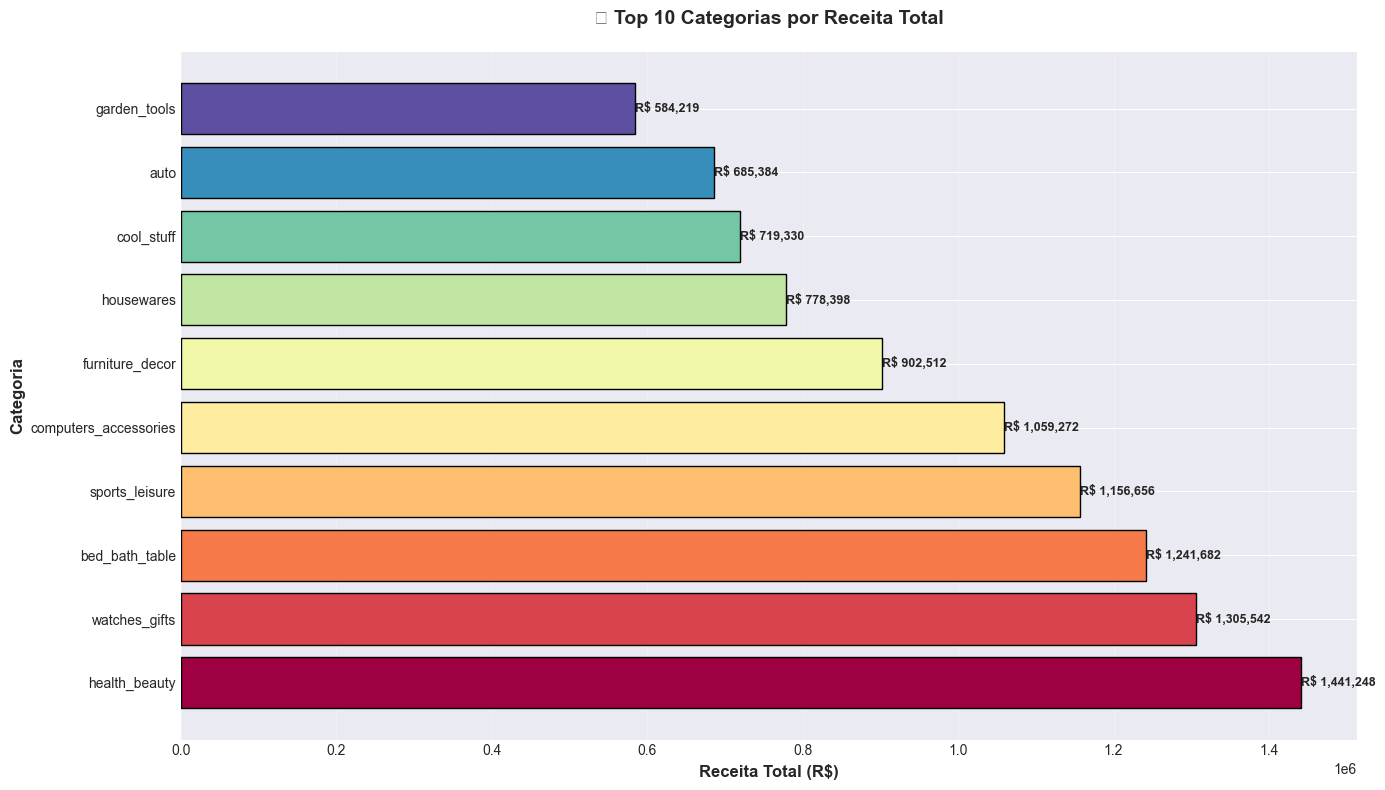

In [15]:
# Gráfico de Receita por Categoria
top_categorias = receita_categoria.head(10)

plt.figure(figsize=(14, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(top_categorias)))

bars = plt.barh(top_categorias['categoria'], top_categorias['receita_total'], color=colors, edgecolor='black')

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'R$ {width:,.0f}', 
             ha='left', va='center', fontsize=9, fontweight='bold')

plt.xlabel('Receita Total (R$)', fontsize=12, fontweight='bold')
plt.ylabel('Categoria', fontsize=12, fontweight='bold')
plt.title('🏆 Top 10 Categorias por Receita Total', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


### 5. Análise de Distribuição de Valores


In [16]:
# ============================================
# DISTRIBUIÇÃO DE VALORES DE PEDIDOS
# ============================================

pedidos_valores = order_lines.groupby('order_id')['item_gmv'].sum().reset_index()
pedidos_valores.columns = ['order_id', 'valor_pedido']

# Estatísticas descritivas
print("\n ESTATÍSTICAS DE DISTRIBUIÇÃO DOS VALORES DE PEDIDOS")
print("=" * 70)
print(f"Média..................: R$ {pedidos_valores['valor_pedido'].mean():,.2f}")
print(f"Mediana................: R$ {pedidos_valores['valor_pedido'].median():,.2f}")
print(f"Desvio Padrão..........: R$ {pedidos_valores['valor_pedido'].std():,.2f}")
print(f"Mínimo.................: R$ {pedidos_valores['valor_pedido'].min():,.2f}")
print(f"Máximo.................: R$ {pedidos_valores['valor_pedido'].max():,.2f}")
print(f"1º Quartil (25%).......: R$ {pedidos_valores['valor_pedido'].quantile(0.25):,.2f}")
print(f"3º Quartil (75%).......: R$ {pedidos_valores['valor_pedido'].quantile(0.75):,.2f}")
print(f"Percentil 90%..........: R$ {pedidos_valores['valor_pedido'].quantile(0.90):,.2f}")
print(f"Percentil 95%..........: R$ {pedidos_valores['valor_pedido'].quantile(0.95):,.2f}")
print("=" * 70)

# Segmentação por faixa de valor
def classificar_pedido(valor):
    if valor < 50:
        return '1. Até R$ 50'
    elif valor < 100:
        return '2. R$ 50 - R$ 100'
    elif valor < 200:
        return '3. R$ 100 - R$ 200'
    elif valor < 500:
        return '4. R$ 200 - R$ 500'
    else:
        return '5. Acima de R$ 500'

pedidos_valores['faixa_valor'] = pedidos_valores['valor_pedido'].apply(classificar_pedido)

distribuicao_faixas = pedidos_valores.groupby('faixa_valor').agg({
    'order_id': 'count',
    'valor_pedido': 'sum'
}).reset_index()

distribuicao_faixas.columns = ['faixa', 'quantidade', 'receita']
distribuicao_faixas['percentual_pedidos'] = distribuicao_faixas['quantidade'] / distribuicao_faixas['quantidade'].sum() * 100
distribuicao_faixas['percentual_receita'] = distribuicao_faixas['receita'] / distribuicao_faixas['receita'].sum() * 100

print("\n DISTRIBUIÇÃO POR FAIXA DE VALOR")
print("=" * 90)
print(f"{'Faixa de Valor':<20} {'Pedidos':>10} {'% Pedidos':>12} {'Receita (R$)':>15} {'% Receita':>12}")
print("=" * 90)

for _, row in distribuicao_faixas.iterrows():
    print(f"{row['faixa']:<20} {row['quantidade']:>10,} {row['percentual_pedidos']:>11.1f}% "
          f"{row['receita']:>15,.2f} {row['percentual_receita']:>11.1f}%")

print("=" * 90)



 ESTATÍSTICAS DE DISTRIBUIÇÃO DOS VALORES DE PEDIDOS
Média..................: R$ 160.58
Mediana................: R$ 105.29
Desvio Padrão..........: R$ 220.47
Mínimo.................: R$ 9.59
Máximo.................: R$ 13,664.08
1º Quartil (25%).......: R$ 61.98
3º Quartil (75%).......: R$ 176.87
Percentil 90%..........: R$ 307.69
Percentil 95%..........: R$ 450.53

 DISTRIBUIÇÃO POR FAIXA DE VALOR
Faixa de Valor          Pedidos    % Pedidos    Receita (R$)    % Receita
1. Até R$ 50             16,807        17.0%      619,737.74         3.9%
2. R$ 50 - R$ 100        30,095        30.5%    2,205,089.18        13.9%
3. R$ 100 - R$ 200       31,670        32.1%    4,497,135.55        28.4%
4. R$ 200 - R$ 500       15,861        16.1%    4,600,186.07        29.0%
5. Acima de R$ 500        4,233         4.3%    3,921,404.70        24.8%


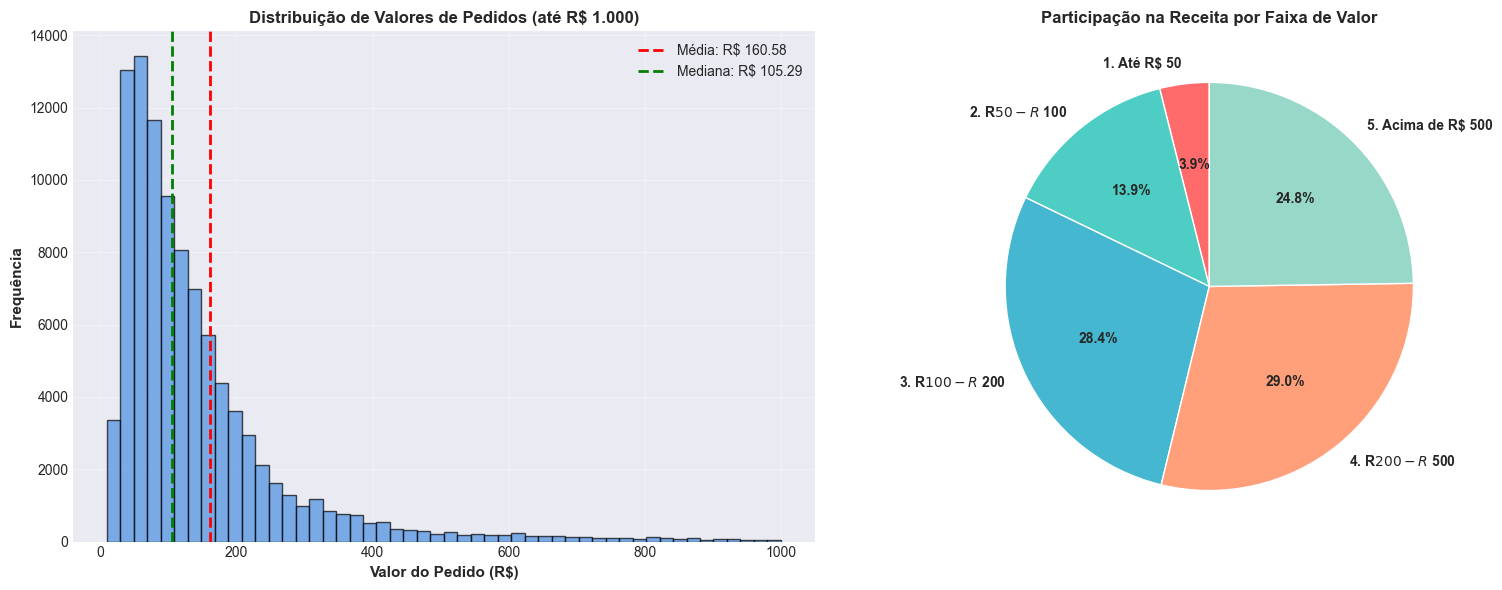

In [17]:
# Visualização da distribuição
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma
ax1 = axes[0]
pedidos_valores_filtrado = pedidos_valores[pedidos_valores['valor_pedido'] <= 1000]  # Filtrar outliers
ax1.hist(pedidos_valores_filtrado['valor_pedido'], bins=50, color='#4A90E2', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Valor do Pedido (R$)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequência', fontsize=11, fontweight='bold')
ax1.set_title('Distribuição de Valores de Pedidos (até R$ 1.000)', fontsize=12, fontweight='bold')
ax1.axvline(pedidos_valores['valor_pedido'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Média: R$ {pedidos_valores["valor_pedido"].mean():.2f}')
ax1.axvline(pedidos_valores['valor_pedido'].median(), color='green', linestyle='--', 
            linewidth=2, label=f'Mediana: R$ {pedidos_valores["valor_pedido"].median():.2f}')
ax1.legend()
ax1.grid(alpha=0.3)

# Pizza - Distribuição por faixa
ax2 = axes[1]
colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
wedges, texts, autotexts = ax2.pie(distribuicao_faixas['percentual_receita'], 
                                     labels=distribuicao_faixas['faixa'],
                                     autopct='%1.1f%%',
                                     colors=colors_pie,
                                     startangle=90,
                                     textprops={'fontsize': 10, 'fontweight': 'bold'})
ax2.set_title('Participação na Receita por Faixa de Valor', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


### 6. Análise Geográfica de Receitas


In [18]:
# ============================================
# RECEITA POR ESTADO
# ============================================

receita_estado = order_lines.groupby('customer_state').agg({
    'item_gmv': 'sum',
    'order_id': 'nunique'
}).reset_index()

receita_estado.columns = ['estado', 'receita', 'pedidos']
receita_estado['ticket_medio'] = receita_estado['receita'] / receita_estado['pedidos']
receita_estado['percentual'] = receita_estado['receita'] / receita_estado['receita'].sum() * 100
receita_estado = receita_estado.sort_values('receita', ascending=False)

print("\n🗺️  TOP 10 ESTADOS POR RECEITA")
print("=" * 85)
print(f"{'Estado':<8} {'Receita (R$)':>15} {'% Total':>10} {'Pedidos':>10} {'Ticket Médio':>15}")
print("=" * 85)

for _, row in receita_estado.head(10).iterrows():
    print(f"{row['estado']:<8} {row['receita']:>15,.2f} {row['percentual']:>9.1f}% "
          f"{row['pedidos']:>10,} {row['ticket_medio']:>15,.2f}")

print("=" * 85)

# Concentração geográfica
top3_estados = receita_estado.head(3)['percentual'].sum()
top5_estados = receita_estado.head(5)['percentual'].sum()

print(f"\n📍 CONCENTRAÇÃO GEOGRÁFICA")
print(f"   ├─ Top 3 Estados representam...: {top3_estados:.1f}% da receita")
print(f"   └─ Top 5 Estados representam...: {top5_estados:.1f}% da receita")



🗺️  TOP 10 ESTADOS POR RECEITA
Estado      Receita (R$)    % Total    Pedidos    Ticket Médio
SP          5,921,678.12      37.4%     41,375          143.12
RJ          2,129,681.98      13.4%     12,762          166.88
MG          1,856,161.49      11.7%     11,544          160.79
RS            885,826.76       5.6%      5,432          163.08
PR            800,935.44       5.1%      4,998          160.25
BA            611,506.67       3.9%      3,358          182.10
SC            610,213.60       3.9%      3,612          168.94
DF            353,229.44       2.2%      2,125          166.23
GO            347,706.93       2.2%      2,007          173.25
ES            324,801.91       2.1%      2,025          160.40

📍 CONCENTRAÇÃO GEOGRÁFICA
   ├─ Top 3 Estados representam...: 62.5% da receita
   └─ Top 5 Estados representam...: 73.2% da receita


/var/folders/4x/hfgjb39s7kl7rrm2hp1c6bq40000gn/T/ipykernel_2460/129325136.py:22: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/4x/hfgjb39s7kl7rrm2hp1c6bq40000gn/T/ipykernel_2460/129325136.py:22: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
/Users/leonardo/Documents/PyCharm/Github/ProjetoExtracaoEco/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leonardo/Documents/PyCharm/Github/ProjetoExtracaoEco/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


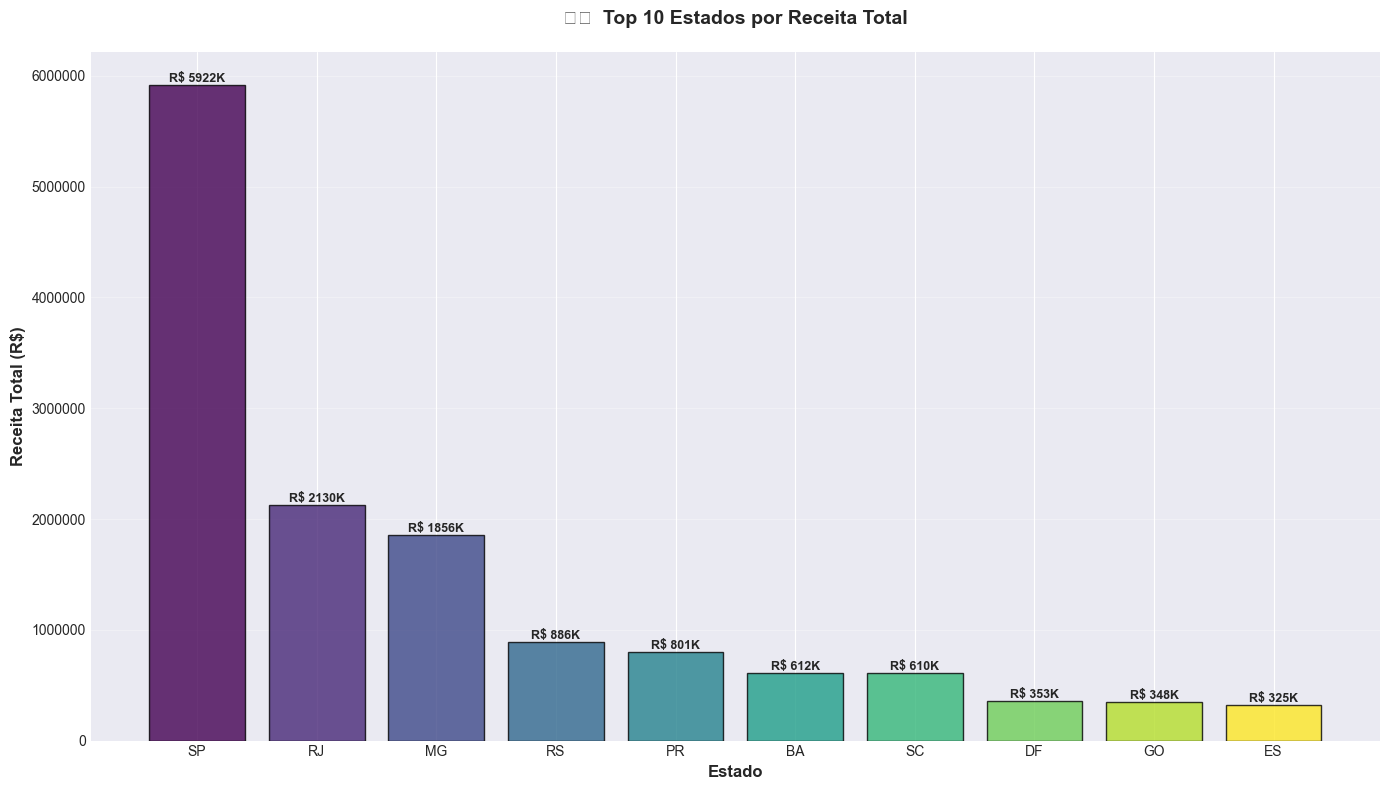

In [19]:
# Gráfico de receita por estado
top_estados = receita_estado.head(10)

plt.figure(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_estados)))

bars = plt.bar(top_estados['estado'], top_estados['receita'], color=colors, edgecolor='black', alpha=0.8)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'R$ {height/1000:.0f}K',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel('Estado', fontsize=12, fontweight='bold')
plt.ylabel('Receita Total (R$)', fontsize=12, fontweight='bold')
plt.title('🗺️  Top 10 Estados por Receita Total', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


### 7. KPIs e Métricas de Performance


In [20]:
# ============================================
# DASHBOARD DE KPIs
# ============================================

print("\n" + "="*100)
print(" " * 35 + "📊 DASHBOARD DE KPIs - VENDAS E RECEITAS")
print("="*100)

# KPIs Financeiros
print("\n💰 KPIs FINANCEIROS")
print("-" * 100)
print(f"GMV Total (Receita Bruta)........: R$ {receita_total:,.2f}")
print(f"Receita Média Diária.............: R$ {receita_total / (order_lines['order_purchase_timestamp'].max() - order_lines['order_purchase_timestamp'].min()).days:,.2f}")
print(f"Receita Média Mensal.............: R$ {vendas_mensais['receita'].mean():,.2f}")
print(f"Ticket Médio por Pedido..........: R$ {ticket_medio:,.2f}")
print(f"Valor Médio por Item.............: R$ {preco_medio_produto:,.2f}")

# KPIs Operacionais
print("\n📦 KPIs OPERACIONAIS")
print("-" * 100)
print(f"Total de Pedidos.................: {total_pedidos:,}")
print(f"Pedidos Médios por Dia...........: {total_pedidos / (order_lines['order_purchase_timestamp'].max() - order_lines['order_purchase_timestamp'].min()).days:,.0f}")
print(f"Total de Itens Vendidos..........: {total_itens:,}")
print(f"Itens por Pedido (média).........: {itens_por_pedido:.2f}")
print(f"Taxa de Conversão por Status.....: {(order_lines[order_lines['order_status'] == 'delivered']['order_id'].nunique() / total_pedidos * 100):.1f}%")

# KPIs de Clientes
clientes_unicos = order_lines['customer_unique_id'].nunique()
print("\n👥 KPIs DE CLIENTES")
print("-" * 100)
print(f"Clientes Únicos..................: {clientes_unicos:,}")
print(f"Receita por Cliente..............: R$ {receita_total / clientes_unicos:,.2f}")
print(f"Pedidos por Cliente..............: {total_pedidos / clientes_unicos:.2f}")

# KPIs de Produto
print("\n🏷️  KPIs DE PRODUTOS")
print("-" * 100)
print(f"Categorias Ativas................: {order_lines['product_category_name_english'].nunique()}")
print(f"Produtos Únicos Vendidos.........: {order_lines['product_id'].nunique():,}")
print(f"Categoria Mais Lucrativa.........: {receita_categoria.iloc[0]['categoria']}")
print(f"Receita da Top Categoria.........: R$ {receita_categoria.iloc[0]['receita_total']:,.2f}")

print("\n" + "="*100)



                                   📊 DASHBOARD DE KPIs - VENDAS E RECEITAS

💰 KPIs FINANCEIROS
----------------------------------------------------------------------------------------------------
GMV Total (Receita Bruta)........: R$ 15,843,553.24
Receita Média Diária.............: R$ 21,763.12
Receita Média Mensal.............: R$ 660,148.05
Ticket Médio por Pedido..........: R$ 160.58
Valor Médio por Item.............: R$ 120.65

📦 KPIs OPERACIONAIS
----------------------------------------------------------------------------------------------------
Total de Pedidos.................: 98,666
Pedidos Médios por Dia...........: 136
Total de Itens Vendidos..........: 112,650
Itens por Pedido (média).........: 1.14
Taxa de Conversão por Status.....: 97.8%

👥 KPIs DE CLIENTES
----------------------------------------------------------------------------------------------------
Clientes Únicos..................: 95,420
Receita por Cliente..............: R$ 166.04
Pedidos por Cliente..........

### 8. Resumo e Insights Estratégicos


In [21]:
print("\n" + "🎯" + "="*98)
print(" " * 35 + "INSIGHTS ESTRATÉGICOS E RECOMENDAÇÕES")
print("="*100)

# Análise de concentração
top_categoria_pct = receita_categoria.iloc[0]['percentual_receita']
top_estado_pct = receita_estado.iloc[0]['percentual']

print("\n PONTOS FORTES:")
print(f"   • Receita total robusta de R$ {receita_total/1000000:.2f} milhões")
print(f"   • Base de {clientes_unicos:,} clientes únicos")
print(f"   • Ticket médio saudável de R$ {ticket_medio:.2f}")

print("\n️  PONTOS DE ATENÇÃO:")
if top_categoria_pct > 20:
    print(f"   • Alta concentração na categoria '{receita_categoria.iloc[0]['categoria']}' ({top_categoria_pct:.1f}%)")
    print(f"     → Recomendação: Diversificar portfólio para reduzir risco")

if top_estado_pct > 40:
    print(f"   • Concentração geográfica elevada em {receita_estado.iloc[0]['estado']} ({top_estado_pct:.1f}%)")
    print(f"     → Recomendação: Expandir para outras regiões")

# Análise de crescimento
crescimento_medio = vendas_mensais['crescimento_receita'].mean()
if not pd.isna(crescimento_medio):
    print(f"\n TENDÊNCIAS:")
    if crescimento_medio > 0:
        print(f"   • Crescimento médio mensal positivo de {crescimento_medio:.1f}%")
    else:
        print(f"   • Crescimento médio mensal negativo de {crescimento_medio:.1f}%")
        print(f"     → Recomendação: Revisar estratégias de marketing e vendas")

print("\n💡 OPORTUNIDADES:")
print(f"   • Foco nas top 5 categorias que representam {receita_categoria.head(5)['percentual_receita'].sum():.1f}% da receita")
print(f"   • Explorar categorias de menor performance com potencial de crescimento")
print(f"   • Analisar sazonalidade para otimizar campanhas promocionais")

print("\n" + "="*100 + "\n")



🎯==================================================================================================
                                   INSIGHTS ESTRATÉGICOS E RECOMENDAÇÕES

 PONTOS FORTES:
   • Receita total robusta de R$ 15.84 milhões
   • Base de 95,420 clientes únicos
   • Ticket médio saudável de R$ 160.58

️  PONTOS DE ATENÇÃO:

 TENDÊNCIAS:
   • Crescimento médio mensal positivo de 31092.1%

💡 OPORTUNIDADES:
   • Foco nas top 5 categorias que representam 39.7% da receita
   • Explorar categorias de menor performance com potencial de crescimento
   • Analisar sazonalidade para otimizar campanhas promocionais




## 9. Regressão Linear para Prever o Preço do Item (sem freight_value)

Nesta seção, treinamos um modelo de Regressão Linear para prever a coluna `price` da tabela `order_lines`.
- Exclusão explícita de `freight_value` das variáveis.
- Pré-processamento: padronização para variáveis numéricas e One-Hot Encoding para categóricas.
- Métricas reportadas: MAE, MSE, RMSE, MedAE, MAPE e R².


In [22]:
# ============================================
# MODELAGEM: Regressão Linear para `price`
# ============================================

import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error,
    make_scorer,
)

# Garantir que a coluna alvo é numérica e remover nulos
order_lines['price'] = pd.to_numeric(order_lines['price'], errors='coerce')
model_df = order_lines.dropna(subset=['price']).copy()

# Definir features candidatas (excluindo explicitamente 'freight_value')
num_candidates = [
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
    # 'n_payments',  # descomente se existir e desejar usar
]
cat_candidates = [
    'product_category_name_english',  # se não existir, cairá para 'product_category_name'
    'product_category_name',
    'seller_state', 'customer_state'
]

# Manter apenas colunas que existem no dataset atual
num_features = [c for c in num_candidates if c in model_df.columns]
cat_features = []
for c in cat_candidates:
    if c in model_df.columns:
        # Evitar incluir as duas variantes de categoria ao mesmo tempo
        if c.startswith('product_category_name'):
            if any(cf.startswith('product_category_name') for cf in cat_features):
                continue
        cat_features.append(c)

feature_cols = num_features + cat_features

# Remover linhas com NaN nas features selecionadas
model_df = model_df.dropna(subset=feature_cols)

X = model_df[feature_cols].copy()
y = model_df['price'].astype(float).values

# Pré-processamento: padronização (num) + one-hot (cat)
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features),
    ],
    remainder='drop'
)

pipe = Pipeline([
    ('preprocess', preprocess),
    ('model', LinearRegression()),
])

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Treinar
pipe.fit(X_train, y_train)

# Predições e métricas (hold-out)
y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# MAPE cuidadoso com zeros
mask = y_test != 0
mape = float(np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100) if mask.any() else np.nan

print("\n" + "🧮" + "="*98)
print(" " * 30 + "REGRESSÃO LINEAR — PREVISÃO DE PRICE (sem freight_value)")
print("="*100)
print(f"Amostras (treino/teste): {len(y_train)}/{len(y_test)}")
print(f"Features numéricas usadas: {num_features}")
print(f"Features categóricas usadas: {cat_features}")
print("-"*100)
print(f"MAE.................: R$ {mae:,.2f}")
print(f"MSE.................: {mse:,.2f}")
print(f"RMSE................: {rmse:,.2f}")
print(f"MedAE...............: R$ {medae:,.2f}")
print(f"MAPE................: {mape:,.2f}%")
print(f"R²..................: {r2:,.4f}")
print("="*100 + "\n")




🧮==================================================================================================
                              REGRESSÃO LINEAR — PREVISÃO DE PRICE (sem freight_value)
Amostras (treino/teste): 88817/22205
Features numéricas usadas: ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
Features categóricas usadas: ['product_category_name_english', 'seller_state', 'customer_state']
----------------------------------------------------------------------------------------------------
MAE.................: R$ 75.51
MSE.................: 28,391.87
RMSE................: 168.50
MedAE...............: R$ 42.25
MAPE................: 105.86%
R²..................: 0.2406



In [24]:

# Print da variável prevista
print("\n🔮 VALORES PREVISTOS (y_pred) - PRIMEIRAS 20 AMOSTRAS")
print("="*80)
print(f"Shape: {y_pred.shape}")
print(f"\nPrimeiros 20 valores previstos:")
for i, val in enumerate(y_pred[:20], 1):
    print(f"  Amostra {i:2d}: R$ {val:,.2f}")
print("="*80)




🔮 VALORES PREVISTOS (y_pred) - PRIMEIRAS 20 AMOSTRAS
Shape: (22205,)

Primeiros 20 valores previstos:
  Amostra  1: R$ 141.13
  Amostra  2: R$ 169.23
  Amostra  3: R$ 51.63
  Amostra  4: R$ 103.37
  Amostra  5: R$ 42.73
  Amostra  6: R$ 70.81
  Amostra  7: R$ 128.24
  Amostra  8: R$ 73.85
  Amostra  9: R$ 114.35
  Amostra 10: R$ 125.06
  Amostra 11: R$ 50.53
  Amostra 12: R$ 165.55
  Amostra 13: R$ 116.84
  Amostra 14: R$ 98.34
  Amostra 15: R$ 55.46
  Amostra 16: R$ 100.81
  Amostra 17: R$ 107.61
  Amostra 18: R$ 51.95
  Amostra 19: R$ 53.64
  Amostra 20: R$ 77.63
